In [1]:
from sklearn.linear_model import LinearRegression as lr
from sklearn.preprocessing import StandardScaler as ss
from sklearn import metrics
import pandas as pd
import json
from dbanalysis import stop_tools
routes = json.loads(open('/home/student/dbanalysis/dbanalysis/resources/trimmed_routes.json','r').read())
route = routes['75'][1]
models = []
scalers = []
all_dummies = []

In [2]:
len(route)

88

## With neural networks

In [2]:
from sklearn.neural_network import MLPRegressor as mlp
from sklearn.preprocessing import StandardScaler as ss
features = ['rain','temp','day','hour']
y_scalers=[]
from sklearn.preprocessing import MinMaxScaler as mms
route=routes['75'][1]
for i in range(1,len(route)-1):
    stopA = str(route[i])
    stopB = str(route[i+1])
    print('Building for',stopA,'to',stopB)

    df = stop_tools.stop_data(stopA,stopB)
    df = df[df['traveltime']>df['traveltime'].quantile(0.05)]
    test = df[df['year']==2017]
    df = df[df['year']==2016]
    df['traveltime'] = df['actualtime_arr_to'] - df['actualtime_arr_from']
    
    scaler = ss()
    X = scaler.fit_transform(df[features])
    y_scaler = ss()
    Y = y_scaler.fit_transform(df['traveltime'].values.reshape(-1,1))
    model = mlp().fit(X,Y)
    preds = model.predict(scaler.transform(test[features]))
    preds = y_scaler.inverse_transform(preds)
    from sklearn import metrics
    print('model for:',stopA,'to',stopB)
    print('min pred:',preds.min())
    print('mean pred:',preds.mean())
    print('max pred:',preds.max())
    print('Mape:',((abs(test['traveltime']-preds)/test['traveltime'])*100).mean())
    print('r2:',metrics.r2_score(test['traveltime'],preds))
    print('mae:',metrics.mean_absolute_error(test['traveltime'],preds),'\n\n')
    models.append(model)
    scalers.append(scaler)
    y_scalers.append(y_scaler)
    del(df)


Building for 4342 to 4348


/home/student/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/student/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


model for: 4342 to 4348
min pred: 64.7285405754246
mean pred: 99.29413494825862
max pred: 118.55782522343385
Mape: 55.13923891017816
r2: 0.003322073003100501
mae: 26.482868632550982 


Building for 4348 to 4646
model for: 4348 to 4646
min pred: 74.78352447870333
mean pred: 126.7860573439865
max pred: 154.51321064393446
Mape: 21.71147382396887
r2: 0.16185697093871199
mae: 25.77612194843842 


Building for 4646 to 4647
model for: 4646 to 4647
min pred: 24.972645013658017
mean pred: 43.46065976593466
max pred: 51.61502608962169
Mape: 31.20857558732081
r2: 0.06658297086214071
mae: 11.37273302423441 


Building for 4647 to 4435
model for: 4647 to 4435
min pred: 75.84458390543973
mean pred: 120.64846343449376
max pred: 144.15862732722113
Mape: 14.368263628064533
r2: 0.15340662061036758
mae: 19.186554978409422 


Building for 4435 to 2605
model for: 4435 to 2605
min pred: 121.64707085378869
mean pred: 206.06640879370295
max pred: 296.51179111855663
Mape: 22.064913548429868
r2: 0.1828990446260

model for: 2861 to 2862
min pred: 39.3973785162417
mean pred: 53.630664937321505
max pred: 80.73819277008518
Mape: 19.577774510060344
r2: 0.028697782299167196
mae: 9.931399884529176 


Building for 2862 to 2863
model for: 2862 to 2863
min pred: 4.033324561810991
mean pred: 9.328750332135924
max pred: 12.406889126941598
Mape: 167.75652789814333
r2: -0.0051584123232952805
mae: 7.913515447183312 


Building for 2863 to 2864
model for: 2863 to 2864
min pred: 27.03258330623573
mean pred: 31.442210129580133
max pred: 38.036997825393236
Mape: 22.89304106212766
r2: 0.00452553427995106
mae: 7.442164875325341 


Building for 2864 to 4486
model for: 2864 to 4486
min pred: 19.940787779385392
mean pred: 49.258795607265206
max pred: 111.60305529997184
Mape: 22.761294075590907
r2: 0.025428119535398364
mae: 12.883096479374124 


Building for 4486 to 4586
model for: 4486 to 4586
min pred: 70.4612114373459
mean pred: 123.24145617364941
max pred: 160.56386886889445
Mape: 28.479636492234746
r2: 0.13351765

model for: 4566 to 4567
min pred: 35.632066315083165
mean pred: 48.29281894044811
max pred: 56.68017140890188
Mape: 27.175776060887877
r2: 0.03226620623302734
mae: 12.526543319903494 


Building for 4567 to 2031
model for: 4567 to 2031
min pred: 56.60704968905829
mean pred: 87.16582635649007
max pred: 102.45935675194592
Mape: 32.243646980076356
r2: 0.013281321830853954
mae: 25.36148560361931 


Building for 2031 to 2032
model for: 2031 to 2032
min pred: 41.4583790665546
mean pred: 74.54405844582902
max pred: 89.62573828387757
Mape: 32.146398680382006
r2: 0.085078962649074
mae: 21.038764331909128 


Building for 2032 to 2033
model for: 2032 to 2033
min pred: 22.825307940679266
mean pred: 28.635614795015087
max pred: 32.74892498583822
Mape: 33.2075516204425
r2: 0.023701992987583687
mae: 8.516874373839498 


Building for 2033 to 2034
model for: 2033 to 2034
min pred: 14.614934263362635
mean pred: 19.542457342287026
max pred: 24.570880895644347
Mape: 38.049597243144206
r2: 0.00274907128571

In [32]:
import pickle
with open('/data/chainedneuralmodels.bin','rb') as handle:
   
    d=pickle.load(handle)
models = d['models']
scalers = d['x-scalers']
y_scalers = d['y-scalers']

In [3]:
def get_merged(stop):
    route = routes['75'][1][1:]
    begins = stop_tools.stop_data(str(route[0]),str(route[1]))
    begins = begins[begins['year']==2017]
    ends = stop_tools.stop_data(str(route[int(stop)]),str(route[int(stop)+1]))
    ends = ends[ends['year']==2017]
    ends['end'] = ends['actualtime_arr_to']
    
    merged = pd.merge(begins,ends[['tripid','dayofservice','routeid','end']], on=['tripid','dayofservice','routeid'])
    merged = merged[merged['traveltime']>0]
    return merged

In [4]:
def run_to_stop(number,verbose=True):
    features = ['rain','temp','day','hour']
    import copy
    global route
    stop = str(route[number])
    index = 0
    merged = get_merged(number)
    df = copy.deepcopy(merged)
    for i,model in enumerate(models):
        
        index+=1
        cur_stop = route[index]
        if cur_stop == route[number+1]:
            break
        X=copy.deepcopy(df[features])
        X = scalers[i].transform(X)
        traveltime = model.predict(X)
        traveltime = y_scalers[i].inverse_transform(traveltime)
        #print(traveltime.mean())
        df['actualtime_arr_from'] = df['actualtime_arr_from'] + traveltime
        df = df[[i for i in df.columns if i[0:4] != 'hour']]
        df['hour'] = (df['actualtime_arr_from'] //3600).astype('int64')
        #arr.append(copy.deepcopy(df))

        
    real_traveltimes = merged['end'] - merged['actualtime_arr_from']

    pred_traveltimes = df['actualtime_arr_from'] - merged['actualtime_arr_from']
    if verbose:
        print(df['actualtime_arr_from'].mean())
        print('MAE:',metrics.mean_absolute_error(real_traveltimes,pred_traveltimes))
        print('MAPE:',((abs(real_traveltimes-pred_traveltimes)/real_traveltimes)*100).mean())
        print('r2:',metrics.r2_score(real_traveltimes,pred_traveltimes))
    return metrics.r2_score(real_traveltimes,pred_traveltimes),((abs(real_traveltimes-pred_traveltimes)/real_traveltimes)*100).mean()

In [6]:
MAPES = []
r2s = []
import time
t = time.time()
for i in range(1,86):
    print(i)
    r2,MAPE = run_to_stop(i,verbose=False)
    r2s.append(r2)
    MAPES.append(MAPE)
print(time.time()-t)



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
290.6744899749756


In [10]:
sum(MAPES)/len(MAPES)

25.756720290171593

In [ ]:
min(MAPES)

In [8]:
from matplotlib import pyplot as plt
plt.plot(range(len(MAPES)),MAPES)
plt.show()

<Figure size 640x480 with 1 Axes>

In [8]:
from matplotlib import pyplot as plt
plt.plot(range(len(r2s)),r2s)


-0.5894347329251236

ValueError: x and y must have same first dimension, but have shapes (60,) and (77,)

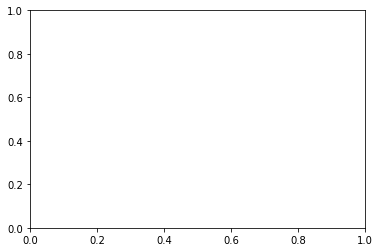

In [9]:
from matplotlib import pyplot as plt
plt.plot(range(9,69),r2s[8:])


In [13]:
max(r2s)

0.5167369239106632

In [17]:
r2s

[-2.3243963800559464,
 -5.122852718987301,
 -1.466225453086044,
 -0.9765732214368865,
 0.04131244740870532,
 -0.05741087802918754,
 -0.21335463841355584,
 -0.044777395479644655,
 0.020514438062677054,
 0.14775545095191123,
 -0.09843726146392595,
 0.0903747652054614,
 0.28604008081344,
 0.20765217756066245,
 0.2723283514588516,
 0.22319049829180637,
 0.2451910419534553,
 0.21236341277763426,
 0.30161277569223943,
 0.3465129756070603,
 0.35254771477960267,
 0.27478340419172265,
 0.2625933693915301,
 0.3497972083635482,
 0.3397104819858573,
 0.3469183890249389,
 0.36170864252864066,
 0.3260883969942254,
 0.40574149757735134,
 0.3272323686015437,
 -0.1736892263550447,
 -0.39244511728335274,
 0.06570195164843029,
 0.2441273048369964,
 0.25790235342469836,
 0.24597415275739953,
 0.2509308891626172,
 0.34613515806401063,
 0.3695159604058712,
 0.38139908855394056,
 0.3796616107914146,
 0.36876404375336835,
 0.36139120455344076,
 0.37522733502024297,
 0.38243218382087707,
 0.40324094695441537,


In [15]:
max(r2s)

0.47391227923156953

In [ ]:
import pickle
with open('/data/chainedneuralmodels.bin','wb') as handle:
    d= {'models':models,\
       'x-scalers':scalers,\
        'y-scalers':y_scalers}
    pickle.dump(d,handle,protocol=pickle.HIGHEST_PROTOCOL)

In [14]:
len(models)

69

A reason not to use these is that these sixty models and scalers pickle to about 6 megabytes. We would need roughly 500-600 megabytes of models in memory then, just to run our time table predictions quickly. Though it is possible we could just load and delete them as needed, the linear models are miniscule in comparison.

They also take much longer to predict than the linear models, (but only slightly), and some still give negative predictions.

Also, an instance can be seen of r2 score sharply plunging at the end of the route. Though I think this is also true for the linear models. The trouble is that, since the training time is so greatly increased, it will be harder to avoid this. Harder than with the liner models anyway.

The r2 scores are significantly better, but the MAPE isn't. The r2 matters to us as data scientists, but it would seem like a) MAPE and b) actually having a working app would be of more concern to the user.






The Mean MAPE was about 13% for the linear models. They're also much faster.